In [9]:
# Importing required Libraries
import torch
import torch.nn as nn
import os
from torch.utils.data import DataLoader,random_split
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid

In [50]:
class SimpleNN(nn.Module): # Constructing Neural Network
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,11)
        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [51]:
simpleNN = SimpleNN()
print(simpleNN) # printing the network

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=11, bias=True)
  )
)


In [52]:
for item in simpleNN.parameters(): # Random initialization of parameters
    print(item)

Parameter containing:
tensor([[-0.0258,  0.0332,  0.0072,  ...,  0.0034,  0.0199,  0.0011],
        [-0.0179, -0.0169, -0.0147,  ..., -0.0286,  0.0110,  0.0319],
        [-0.0205,  0.0159, -0.0068,  ...,  0.0250, -0.0241, -0.0169],
        ...,
        [ 0.0312,  0.0244,  0.0278,  ...,  0.0079, -0.0198,  0.0056],
        [-0.0012,  0.0080,  0.0023,  ...,  0.0041, -0.0071,  0.0029],
        [ 0.0066, -0.0066, -0.0311,  ...,  0.0304,  0.0252,  0.0101]],
       requires_grad=True)
Parameter containing:
tensor([-0.0130,  0.0334,  0.0308, -0.0314,  0.0097, -0.0017, -0.0251, -0.0133,
        -0.0020, -0.0265, -0.0029, -0.0044,  0.0152, -0.0300, -0.0017,  0.0313,
         0.0225,  0.0253, -0.0107,  0.0353, -0.0183,  0.0142, -0.0123, -0.0123,
         0.0024, -0.0329, -0.0101, -0.0352,  0.0153, -0.0007,  0.0236, -0.0300,
         0.0316,  0.0130, -0.0119, -0.0088, -0.0041,  0.0042, -0.0088,  0.0085,
         0.0299,  0.0296,  0.0020,  0.0114, -0.0101,  0.0058, -0.0038, -0.0171,
         0.0135

In [53]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [54]:
test_data=DataLoader(test_data,batch_size=64,shuffle=True)

In [55]:
v_size=0.1
data_size=len(training_data)
val_size=int(v_size*data_size)
train_size=data_size-val_size

In [56]:
train_dataset,validation_dataset=random_split(training_data,[train_size,val_size])
train_data=DataLoader(train_dataset,batch_size=64,shuffle=True)
val_data=DataLoader(validation_dataset,batch_size=64,shuffle=True)

In [57]:
input_size = 784
hidden_size = 500
num_epochs = 10
learning_rate = 0.0001

In [58]:
loss=nn.CrossEntropyLoss() # Cross Entropy loss is used

In [59]:
optimizer=optim.SGD(simpleNN.parameters(),lr=learning_rate,momentum=0.9) # Stochastic Gradient Descent optimizer is uesd

In [60]:
def train_loop(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)
    model.train()# setting the model to training mode
    for batch, (X,y) in enumerate(dataloader):
        pred=model(X)# computing the prediction and loss
        loss=loss_fn(pred,y)
        loss.backward()#performing backward propagataion
        optimizer.step()
        optimizer.zero_grad()
        if batch%100==0:
            loss,current=loss.item(),(batch+1)*len(X)
            print(f"Loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
def test_loop(dataloader,model,loss_fn):
    model.eval()#setting the model to evaluation mode
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    test_loss,correct=0,0
    with torch.no_grad():# to not calculate the gradients during test mode
        for X,y in dataloader:
            pred=model(X)
            test_loss+=loss_fn(pred,y).item()
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
        test_loss/=num_batches
        correct/=size
        print(f"validation error: \n validation loss: {test_loss:>8f}\n")

In [61]:
for t in range(num_epochs): # Training
    print(f"Epoch {t+1}\n-------------------------------------------")
    train_loop(train_data,simpleNN,loss,optimizer)
    test_loop(val_data,simpleNN,loss)
print("Training Completed")

Epoch 1
-------------------------------------------
Loss: 2.382809 [   64/54000]
Loss: 2.381959 [ 6464/54000]
Loss: 2.394509 [12864/54000]
Loss: 2.369274 [19264/54000]
Loss: 2.369697 [25664/54000]
Loss: 2.373699 [32064/54000]
Loss: 2.372780 [38464/54000]
Loss: 2.354548 [44864/54000]
Loss: 2.353386 [51264/54000]
validation error: 
 validation loss: 2.357427

Epoch 2
-------------------------------------------
Loss: 2.351303 [   64/54000]
Loss: 2.357157 [ 6464/54000]
Loss: 2.343284 [12864/54000]
Loss: 2.341186 [19264/54000]
Loss: 2.350852 [25664/54000]
Loss: 2.338837 [32064/54000]
Loss: 2.324759 [38464/54000]
Loss: 2.316993 [44864/54000]
Loss: 2.331938 [51264/54000]
validation error: 
 validation loss: 2.318626

Epoch 3
-------------------------------------------
Loss: 2.331049 [   64/54000]
Loss: 2.314676 [ 6464/54000]
Loss: 2.297890 [12864/54000]
Loss: 2.301160 [19264/54000]
Loss: 2.282994 [25664/54000]
Loss: 2.276294 [32064/54000]
Loss: 2.284391 [38464/54000]
Loss: 2.251574 [44864/540

In [62]:
torch.save(simpleNN,'simpleNN.pth') # Saving the model


In [63]:
model=torch.load('simpleNN.pth') # Loading the model

In [64]:
import matplotlib.pyplot as plt

In [65]:
simpleNN.eval()

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=11, bias=True)
  )
)

In [66]:
labels_map=[
    "T-Shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot"
]

In [68]:
predictions = []
for batch in test_data:
    inputs, _ = batch  # Assuming the DataLoader returns inputs and labels, but we're only interested in inputs
    with torch.no_grad():
        outputs = simpleNN(inputs)  # Forward pass to get predictions
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(probabilities, 1)
    predictions.extend(predicted_classes.tolist())

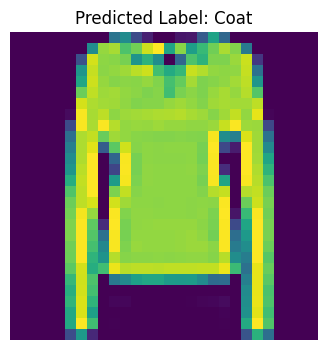

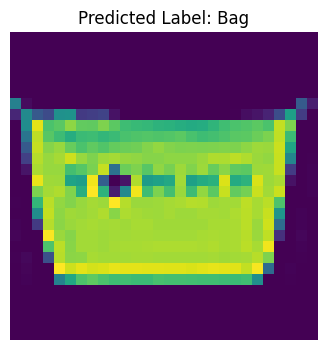

In [72]:
for batch_idx, (inputs, labels) in enumerate(test_data):
    if batch_idx >= 2:
        break  # Only process the first two batches

    # Forward pass to get predictions
    with torch.no_grad():
        outputs = simpleNN(inputs)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(probabilities, 1)

    # Convert the predicted class index to class label
    predicted_label = labels_map[predicted_classes[0].item()]

    # Display the image and its corresponding predicted label
    plt.figure(figsize=(4, 4))
    plt.imshow(inputs[0].permute(1, 2, 0))
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()
